In [2]:
#!pip install gensim

In [70]:
import numpy as np
import pandas as pd
import gensim
import nltk
import matplotlib.pyplot as plt

In [53]:
reviews=pd.read_csv('amazon_reviews_big.csv')
docs=reviews['reviewText'].fillna('').str.lower().str.replace('[^a-z ]','')
docs.shape

(100000,)

In [54]:
stopwords=nltk.corpus.stopwords.words('english')
custom_stopwords=['','use','one','great', 'work', 'like', 'get', 'user']
stopwords.extend(custom_stopwords)
stemmer=nltk.stem.PorterStemmer()
def clean_sentence(text):
    return [stemmer.stem(word) for word in text.split(' ') if word not in stopwords]
docs_clean=docs.apply(clean_sentence)

In [57]:
dictionary=gensim.corpora.Dictionary(docs_clean)


In [58]:
len([(key, value) for key, value in dictionary.items()])

153025

In [59]:
docs_bows=[]
for docs in docs_clean:
    bow= dictionary.doc2bow(docs)
    docs_bows.append(bow)

In [60]:
#dictionary.doc2bow(docs_clean.iloc[0])

In [61]:
model=gensim.models.LdaModel(docs_bows, id2word=dictionary, num_topics=4)
model

In [62]:
model.get_document_topics(docs_bows[0])

[(1, 0.38676652), (2, 0.1839399), (3, 0.4251293)]

In [63]:
model.print_topics()

[(0,
  '0.020*"camera" + 0.015*"case" + 0.009*"len" + 0.008*"fit" + 0.008*"well" + 0.007*"good" + 0.007*"use" + 0.006*"would" + 0.006*"look" + 0.006*"cover"'),
 (1,
  '0.012*"drive" + 0.011*"work" + 0.009*"usb" + 0.008*"use" + 0.008*"card" + 0.007*"batteri" + 0.007*"devic" + 0.007*"time" + 0.007*"comput" + 0.006*"would"'),
 (2,
  '0.013*"tv" + 0.009*"set" + 0.008*"use" + 0.008*"video" + 0.007*"remot" + 0.006*"mous" + 0.006*"pictur" + 0.006*"button" + 0.006*"keyboard" + 0.005*"would"'),
 (3,
  '0.022*"sound" + 0.014*"cabl" + 0.012*"speaker" + 0.011*"good" + 0.009*"qualiti" + 0.008*"headphon" + 0.007*"price" + 0.006*"music" + 0.006*"router" + 0.006*"would"')]

In [64]:
df_topic_word=pd.DataFrame(model.get_document_topics(docs_bows[0]), columns=['topic', 'prob'])
df_topic_word.sort_values('prob', ascending=False).iloc[0]['topic']

3.0

In [67]:
topics=[]
for docs in docs_bows:
    df_topic_word= pd.DataFrame(model.get_document_topics(docs), columns=['topic', 'prob'])
    curr_topic=df_topic_word.sort_values('prob', ascending=False).iloc[0]['topic']
    topics.append(curr_topic)

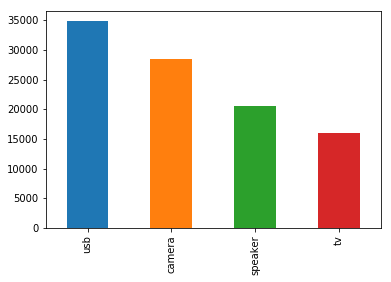

In [71]:
reviews['topic']=topics
topic_names={0:'camera', 1:'usb', 2:'tv', 3: 'speaker'}
reviews['topic']=reviews['topic'].replace(topic_names)
reviews['topic'].value_counts().plot.bar()
plt.show()